<a href="https://colab.research.google.com/github/ak283/Amazon-food-review-using-bert/blob/main/bert_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment analysis of Amazon food review based on customers text reviews and
comments.**

In [1]:
!pip install transformers

In [2]:
#!pip install tensorflow

In [3]:
!pip install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
import torch

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
df=pd.read_csv('Reviews.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6263 entries, 0 to 6262
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      6263 non-null   int64 
 1   ProductId               6263 non-null   object
 2   UserId                  6263 non-null   object
 3   ProfileName             6263 non-null   object
 4   HelpfulnessNumerator    6263 non-null   int64 
 5   HelpfulnessDenominator  6263 non-null   int64 
 6   Score                   6263 non-null   int64 
 7   Time                    6263 non-null   int64 
 8   Summary                 6263 non-null   object
 9   Text                    6262 non-null   object
dtypes: int64(5), object(5)
memory usage: 489.4+ KB


In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
df['Score'].value_counts()

Score
5    4017
4     844
1     576
3     478
2     348
Name: count, dtype: int64

In [9]:
seq_len = 512
num_samples= len(df)

xid = np.zeros((num_samples, seq_len))
xmask = np.zeros((num_samples, seq_len))

In [10]:
xid.shape

(6263, 512)

In [11]:

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [12]:
token= tokenizer("i do not hate you", return_tensors ='pt')

In [13]:
token

{'input_ids': tensor([[  101,   151, 10154, 10497, 39487, 10855,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [14]:
result = model(**token)

In [15]:
result.logits

tensor([[ 0.5356, -0.2140, -0.4954, -0.4189,  0.4779]],
       grad_fn=<AddmmBackward0>)

In [16]:
int(torch.argmax(result.logits))+1

1

In [17]:
df.sample(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1540,1541,B000E7WM0K,A2GBFT3IGK7862,"Frankly Speaking ""Hard work never killed anyo...",0,0,4,1309824000,More than just a taste of Thai,Provided you use clean (preferably purified) w...
4100,4101,B001EW5YQS,AJA31UYVQP4UI,"S. Gresham ""Symonty""",1,1,4,1259193600,Great value way to use my nice Rode mic,I have some nice mics round my place for video...
3166,3167,B003OZYUEA,A52KI87KEWX39,the contented cat,0,0,4,1309910400,Spring Water,I enjoyed this water. It was very refreshing....


In [18]:
for i in df['Text'].head():
    print(i)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.
If you are looking for the secret i

In [27]:
sentiment=[]
for i in df['Text'].head(1000):
    tokens =  tokenizer(i, return_tensors ='pt',max_length=512)
    result = model(**tokens)
    sentiment.append(int(torch.argmax(result.logits))+1)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [31]:
df1=df[['Text', 'Score']].head(1000).copy()
df1["Pred_score"]= sentiment

In [32]:
df1

,Text,Score,Pred_score
0,I have bought several of the Vitality canned d...,5,5
1,Product arrived labeled as Jumbo Salted Peanut...,1,1
2,This is a confection that has been around a fe...,4,5
3,If you are looking for the secret ingredient i...,2,5
4,Great taffy at a great price. There was a wid...,5,5
...,...,...,...
995,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...,5,5
996,"Man what can i say, this salsa is the bomb!! i...",5,5
997,this sauce is so good with just about anything...,5,5
998,Not hot at all. Like the other low star review...,1,1


In [33]:
print(classification_report(df1['Score'],df1["Pred_score"]))

              precision    recall  f1-score   support

           1       0.71      0.66      0.69        98
           2       0.23      0.47      0.31        47
           3       0.30      0.43      0.36        75
           4       0.28      0.46      0.35       138
           5       0.91      0.69      0.79       642

    accuracy                           0.62      1000
   macro avg       0.49      0.54      0.50      1000
weighted avg       0.73      0.62      0.66      1000



In [34]:
cm=confusion_matrix(df1["Score"],df1["Pred_score"])

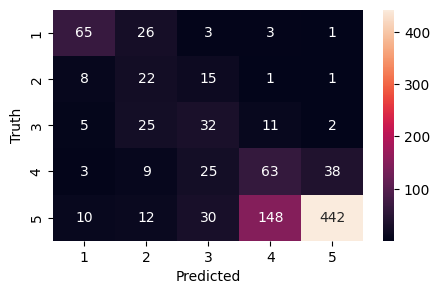

In [39]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks([0.5,1.5,2.5,3.5,4.5], [1,2,3,4,5])
plt.yticks([0.5,1.5,2.5,3.5,4.5], [1,2,3,4,5])
plt.show()